In [1]:
import sys
sys.path.append("../")

import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier

from utils.numerical_to_cat import credit_to_cat, salary_to_cat

import warnings
# Suppress all future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Training

## Read Data

In [2]:
train_data = pd.read_csv("../data/complete_responses.csv")

In [3]:
target_col = ["brand"]
X = train_data.drop(columns=target_col)
y = train_data[target_col]

## Class Imbalance

In [4]:
# SMOTE
smote = SMOTE(sampling_strategy="auto", random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

## Discretization of numerical feature

### Salary

In [5]:
salary_q1 = X[["salary"]].describe().loc["25%"].values[0]
salary_q2 = X[["salary"]].describe().loc["50%"].values[0]
salary_q3 = X[["salary"]].describe().loc["75%"].values[0]

salary_boundary_map = {
    1: {"min": salary_q1},
    2: {"min": salary_q1, "max": salary_q2},
    3: {"min": salary_q2, "max": salary_q3},
    4: {"max": salary_q3}
}

In [6]:
salary_cat = salary_to_cat(X[["salary"]], salary_boundary_map)
X["salary"] = salary_cat

In [7]:
salary_resampled_cat = salary_to_cat(X_resampled[["salary"]], salary_boundary_map)
X_resampled["salary"] = salary_resampled_cat

### Credit

In [8]:
credit_q1 = X[["credit"]].describe().loc["25%"].values[0]
credit_q2 = X[["credit"]].describe().loc["50%"].values[0]
credit_q3 = X[["credit"]].describe().loc["75%"].values[0]

credit_boundary_map = {
    1: {"min": credit_q1},
    2: {"min": credit_q1, "max": credit_q2},
    3: {"min": credit_q2, "max": credit_q3},
    4: {"max": credit_q3}
}

In [9]:
credit_cat = credit_to_cat(X[["credit"]], credit_boundary_map)
X["credit"] = credit_cat

In [10]:
credit_resampled_cat = credit_to_cat(X_resampled[["credit"]], credit_boundary_map)
X_resampled["credit"] = credit_resampled_cat

## Modeling

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
pipeline = Pipeline(steps=[
    ("classifier", XGBClassifier())
])

param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__learning_rate': [0.01, 0.1, 0.2],
    'classifier__max_depth': [3, 4, 5]
}

grid_search_base = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy')

## Base data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [16]:
grid_search_base.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_policy=None,
                                                      importance_type=None,
                                                      interaction_constr...
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             param_grid={'classifier__learning_rate': [0.01, 0.1, 0.2],
                         'classifier__max_depth': [3, 4, 5],
                         'classifier__n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [17]:
y_pred = grid_search_base.predict(X_test)
matrix = metrics.confusion_matrix(y_test, y_pred)

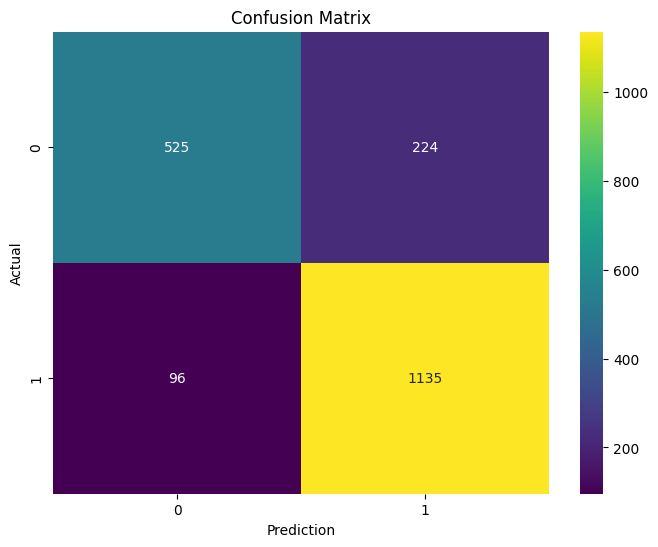

In [18]:
plt.figure(figsize = (8,6))
sns.heatmap(matrix, annot = True, fmt = '.0f', cmap = 'viridis')
plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [19]:
report = metrics.classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.70      0.77       749
           1       0.84      0.92      0.88      1231

    accuracy                           0.84      1980
   macro avg       0.84      0.81      0.82      1980
weighted avg       0.84      0.84      0.83      1980



## SMOTE data

In [20]:
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled)

In [21]:
grid_search_resampled = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search_resampled.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      device=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_types=None,
                                                      gamma=None,
                                                      grow_policy=None,
                                                      importance_type=None,
                                                      interaction_constr...
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=None, ...))]),
             param_grid={'classifier__learning_rate': [0.01, 0.1, 0.2],
                         'classifier__max_depth': [3, 4, 5],
                         'classifier__n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [22]:
y_pred_resample = grid_search_resampled.predict(X_test_resampled)
matrix = metrics.confusion_matrix(y_test_resampled, y_pred_resample)

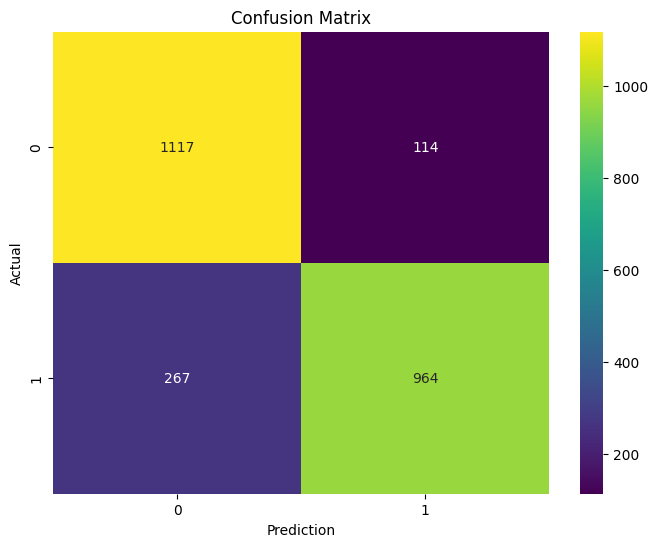

In [23]:
plt.figure(figsize = (8,6))
sns.heatmap(matrix, annot = True, fmt = '.0f', cmap = 'viridis')
plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

In [24]:
report = metrics.classification_report(y_test_resampled, y_pred_resample)
print(report)

              precision    recall  f1-score   support

           0       0.81      0.91      0.85      1231
           1       0.89      0.78      0.83      1231

    accuracy                           0.85      2462
   macro avg       0.85      0.85      0.84      2462
weighted avg       0.85      0.85      0.84      2462



# Save model

In [27]:
import joblib

In [25]:
model_obj = {
    "model": grid_search_resampled,
    "utils": {
        "boundary": {
            "salary": salary_boundary_map,
            "credit": credit_boundary_map
            }
        }
    }

In [28]:
joblib.dump(model_obj, "../model/grid_search_model.pkl")

['../model/grid_search_model.pkl']